In [1]:
import numpy as np
import sympy as sy

sy.init_printing()

In [2]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [3]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"  # display multiple lines

In [4]:
def round_expr(expr, num_digits):
    return expr.xreplace({n: round(n, num_digits) for n in expr.atoms(sy.Number)})

# <font face="gotham" color="purple"> Matrix Operations</font>

Matrix _addition_ operations are straightforward:
1. $A+ B= B+ A$
2. $(A+B)+ C=A+(B+C)$
3. $c(A+B)=cA+cB$
4. $(c+d)A=cA+c{D}$
5. $c(dA)=(cd)A$
6. $A+{0}=A$, where ${0}$ is the zero matrix
7. For any $A$, there exists an $- A$, such that $ A+(- A)=0$.

They are as obvious as it looks, so no proofs are provided. And the matrix _multiplication_ properties are:
1. $ A({BC})=({AB}) C$
2. $c({AB})=(cA)B=A(cB)$
3. $A(B+ C)={AB}+{AC}$
4. $(B+C)A={BA}+{CA}$

Note that we need to differentiate between two types of multiplication: _Hadamard multiplication_, denoted as $A \odot B$ (element-wise multiplication), and _matrix multiplication_, denoted simply as $AB$.

In [5]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

In [6]:
A * B  # this is Hadamard elementwise product

array([[ 5, 12],
       [21, 32]])

In [7]:
A @ B  # this is matrix product

array([[19, 22],
       [43, 50]])

Let's show explicitly the matrix multiplication rule for each element:

In [8]:
np.sum(A[0, :] * B[:, 0])  # element at (1, 1)
np.sum(A[1, :] * B[:, 0])  # element at (2, 1)
np.sum(A[0, :] * B[:, 1])  # element at (1, 2)
np.sum(A[1, :] * B[:, 1])  # element at (2, 2)

np.int64(19)

np.int64(43)

np.int64(22)

np.int64(50)

## <font face="gotham" color="purple"> SymPy Demonstration: Addition </font>

Let's define all the letters as symbols in case we need to use them repeatedly. With this library, we can perform computations analytically, making it a valuable tool for learning linear algebra.

In [9]:
a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z = (
    sy.symbols(
        "a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z",
        real=True,
    )
)

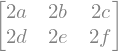

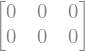

In [10]:
A = sy.Matrix([[a, b, c], [d, e, f]])
A + A
A - A

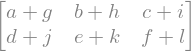

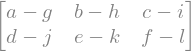

In [11]:
B = sy.Matrix([[g, h, i], [j, k, l]])
A + B
A - B

## <font face="gotham" color="purple"> SymPy Demonstration: Multiplication </font>

The matrix multiplication rules can be clearly understood by using symbols.

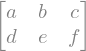

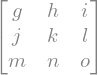

In [12]:
A = sy.Matrix([[a, b, c], [d, e, f]])
B = sy.Matrix([[g, h, i], [j, k, l], [m, n, o]])
A
B

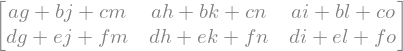

In [13]:
AB = A * B
AB

## <font face="gotham" color="purple"> Commutability </font>

Matrix multiplication usually does not commute, meaning ${AB} \neq {BA}$. For instance, consider matrices $A$ and $B$:

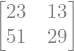

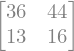

In [14]:
A = sy.Matrix([[3, 4], [7, 8]])
B = sy.Matrix([[5, 3], [2, 1]])
A * B
B * A

How do we find a commutable matrix? Let's try find out analytically

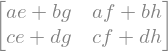

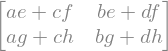

In [15]:
A = sy.Matrix([[a, b], [c, d]])
B = sy.Matrix([[e, f], [g, h]])
A * B
B * A

To show ${AB} = {BA}$, we need to prove ${AB} - {BA} = 0$

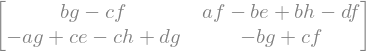

In [16]:
M = A * B - B * A
M

That gives us a system of linear equations
$$
\begin{align}
b g - c f&=0 \\
 a f - b e + b h - d f&=0\\
- a g + c e - c h + d g&=0 \\
- b g + c f&=0
\end{align}
$$

To solve it, we can use the Gauss-Jordan elimination method. If we treat $a, b, c, d$ as coefficients of the system, we can extract an augmented matrix.
$$
\begin{align*}
b g-c f=0 \quad &\Rightarrow-c f+b g+0 e+0 h=0\\
a f-b e+b h-d f=0 \quad &\Rightarrow(a-d) f+0 g-b e+b h=0\\
-a g+c e-c h+d g=0 \quad &\Rightarrow 0 f+(d-a) g+c e-c h=0\\
-b g+c f=0 \quad &\Rightarrow c f-b g+0 e+0 h=0
\end{align*}
$$

So the augmented matrix takes the form
$$
\begin{equation}
\left[\begin{array}{cccc:c}
-c & b & 0 & 0 & 0 \\
a-d & 0 & -b & b & 0 \\
0 & d-a & c & -c & 0 \\
c & -b & 0 & 0 & 0
\end{array}\right]
\end{equation}
$$

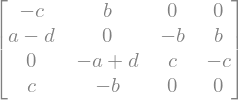

In [17]:
A_aug = sy.Matrix([[-c, b, 0, 0], [a - d, 0, -b, b], [0, d - a, c, -c], [c, -b, 0, 0]])
A_aug

Perform _Gaussian-Jordon_ elimination till row reduced formed.

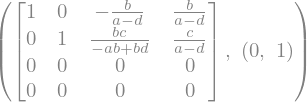

In [18]:
A_aug.rref()

The general solution is 
$$
\begin{equation}
\left(\begin{array}{l}
e \\
f \\
g \\
h
\end{array}\right)=c_1\left(\begin{array}{c}
\frac{b}{a-d} \\
\frac{b c}{a b-b d} \\
1 \\
0
\end{array}\right)+c_2\left(\begin{array}{c}
-\frac{b}{a-d} \\
-\frac{c}{a-d} \\
0 \\
1
\end{array}\right)
\end{equation}
$$

In [19]:
import sympy as sp

# Define symbolic entries for A (2x2 matrix)
a, b, c, d = sp.symbols("a b c d")

# Define symbolic entries for B (2x2 matrix)
e, f, g, h = sp.symbols("e f g h")

# Define matrices A and B
A = sp.Matrix([[a, b], [c, d]])
B = sp.Matrix([[e, f], [g, h]])

# Compute AB and BA
AB = A * B
BA = B * A

# Set up equations AB = BA
equations = [sp.Eq(AB[i, j], BA[i, j]) for i in range(2) for j in range(2)]

# Solve the system of equations
solution = sp.solve(equations, (e, f, g, h))

# Print the general solutions
print("Solution for B elements:")
for sol in solution:
    print(f"{sol}: {solution[sol]}")

# To express the solution in a parameterized form, let's substitute specific values
# Define parameters c1 and c2
c1, c2 = sp.symbols("c1 c2")

# Define the parameterized solution
parametric_solution = {
    e: solution[e].subs({g: c1, h: c2}),
    f: solution[f].subs({g: c1, h: c2}),
    g: c1,
    h: c2,
}

# Print the parameterized solution in LaTeX format
print("\nParameterized solution in LaTeX format:")
for sol in parametric_solution:
    print(f"{sp.latex(sol)}: {sp.latex(parametric_solution[sol])}")

Solution for B elements:
e: h + g*(a - d)/c
f: b*g/c

Parameterized solution in LaTeX format:
e: c_{2} + \frac{c_{1} \left(a - d\right)}{c}
f: \frac{b c_{1}}{c}
g: c_{1}
h: c_{2}


$$
e: c_{2} + \frac{c_{1} \left(a - d\right)}{c}\\
f: \frac{b c_{1}}{c}\\
g: c_{1}\\
h: c_{2}\\
$$

# <font face="gotham" color="purple"> Transpose of Matrices </font>

Matrix $A_{n\times m}$ and its transpose is 

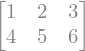

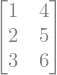

In [20]:
A = sy.Matrix([[1, 2, 3], [4, 5, 6]])
A
A.transpose()

The properties of transpose are
1. $(A^T)^T$
2. $(A+B)^T=A^T+B^T$
3. $(cA)^T=cA^T$
4. $(AB)^T=B^TA^T$

We can show why the last property holds with SymPy, define $A$ and $B$, multiply them, then transpose, that means $(AB)^T$

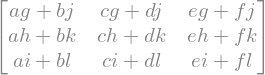

In [21]:
A = sy.Matrix([[a, b], [c, d], [e, f]])
B = sy.Matrix([[g, h, i], [j, k, l]])
AB = A * B
AB_t = AB.transpose()
AB_t

Transpose $A$ and $B$, then multiply, meaning $B^TA^T$

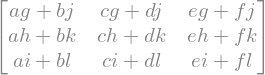

In [22]:
B_t_A_t = B.transpose() * A.transpose()
B_t_A_t

Check if they are equal

In [23]:
AB_t == B_t_A_t

True

# <font face="gotham" color="purple"> Identity Matrices </font>

This is an identity matrix $I_5$, only $1$'s on principal diagonal, all rest elements are $0$'s.

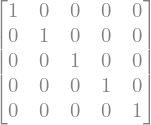

In [24]:
sy.eye(5)

Identity matrix properties:

$$
AI=IA = A
$$

Let's generate $ I$ and $ A$ and show if it holds

In [25]:
I = np.eye(5)
I

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [26]:
A = np.around(np.random.rand(5, 5) * 100)
A  # generate a random matrix

array([[ 69.,  59.,  46.,  56.,  50.],
       [ 37.,  54.,  12.,  62.,  14.],
       [100.,  45.,  45.,  77.,  35.],
       [ 83.,  14.,  30.,  17.,  73.],
       [ 48.,  11.,  64.,  17.,  88.]])

Check if they are equal

In [27]:
(A @ I == I @ A).all()

np.True_

# <font face="gotham" color="purple"> Elementary Matrix </font>

An _elementary matrix_ is a matrix that can be obtained from a single elementary row operation on an identity matrix. Such as:

$$
\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}
\right]
\begin{array}{c}
R_1 \leftrightarrow R_2 \\
~ \\
~
\end{array}
\qquad \Longrightarrow \qquad
\left[
\begin{array}{ccc}
0 & 1 & 0 \\
1 & 0 & 0 \\
0 & 0 & 1
\end{array}
\right]
$$

Where $R_1 \leftrightarrow R_2$ means exchanging row 1 and row 2, we denote the transformed matrix as $E$. Then, left multiply $E$ onto a matrix $A$ will perform the exact the same row operation. 

First, generate matrix $A$.

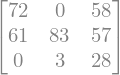

In [28]:
A = sy.randMatrix(3, percent=80)
A  # generate a random matrix with 80% of entries being nonzero

Create an elementary matrix with $R_1\leftrightarrow R_2$

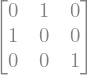

In [29]:
E = sy.Matrix([[0, 1, 0], [1, 0, 0], [0, 0, 1]])
E

Notice that by left-multiplying $E$ onto $A$, matrix $A$ also switches rows 1 and 2.

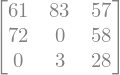

In [30]:
E * A

Adding a multiple of a row onto another row in the identity matrix also gives us an elementary matrix.

$$

\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}
\right]\\

\begin{array}{c}
R_3-7R_1
\end{array}
\longrightarrow
\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
-7 & 0 & 1
\end{array}
\right]

$$

Let's verify with SymPy.

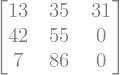

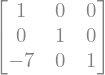

In [31]:
A = sy.randMatrix(3, percent=80)
A
E = sy.Matrix([[1, 0, 0], [0, 1, 0], [-7, 0, 1]])
E

We will see the $R_3-7R_1$ takes places on $A$

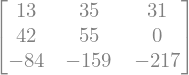

In [32]:
E * A

We can also reproduce this by explicit row operation on $ A$.

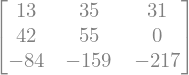

In [33]:
EA = sy.matrices.MatrixBase.copy(A)
EA[2, :] = -7 * EA[0, :] + EA[2, :]
EA

In the next section, we will refresh an important conclusion: an _invertible matrix_ is a product of a series of elementary matrices.

# <font face="gotham" color="purple"> Inverse Matrices </font>

If ${AB}={BA}=\mathbf{I}$, $ B$ is called the inverse of matrix $  A$, denoted as $ B=  A^{-1}$.


NumPy has convenient function ```np.linalg.inv()``` for computing inverse matrices. Generate $ A$

In [34]:
A = np.round(10 * np.random.randn(5, 5))
A

array([[ 18.,  -1.,   5.,  -1.,   3.],
       [  1.,   2.,   2.,  -9.,   2.],
       [ -5.,   5.,   8.,   3.,  -6.],
       [-11.,   4.,  16.,  -1.,  16.],
       [-10.,  -7., -10.,  -6.,   8.]])

In [35]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 0.014,  0.008, -0.055, -0.004, -0.041],
       [-0.242,  0.105, -0.355,  0.051, -0.303],
       [ 0.129, -0.026,  0.214, -0.003,  0.125],
       [-0.037, -0.093, -0.075,  0.022, -0.062],
       [-0.061, -0.   , -0.168,  0.052, -0.082]])

Verify if they are truly inverse of each other

In [36]:
A @ Ainv

array([[ 1., -0.,  0.,  0.,  0.],
       [-0.,  1., -0.,  0., -0.],
       [ 0.,  0.,  1., -0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [-0., -0.,  0.,  0.,  1.]])

The ```-0.``` means there are more digits after point, but omitted here.

## <font face="gotham" color="purple"> Gauss-Jordan Elimination Method for Matrix Inversion</font>

A convenient way to calculate the inverse of a matrix is to construct an augmented matrix $[A \,|\, \mathbf{I}]$. Then, multiply a series of elementary matrices $E$ (representing elementary row operations) until matrix $A$ is in row-reduced form. If $A$ is of full rank, this process will transform $A$ into an identity matrix $\mathbf{I}$. Consequently, the identity matrix on the right-hand side of the augmented matrix will be converted into $A^{-1}$ automatically.

We can demonstrate this using SymPy's `.rref()` function on the augmented matrix $[A \,|\, \mathbf{I}]$.

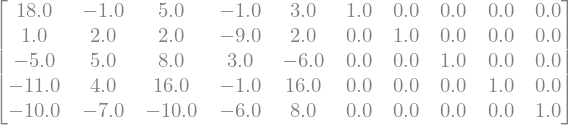

In [37]:
AI = np.hstack((A, I))  # stack the matrix A and I horizontally
AI = sy.Matrix(AI)
AI

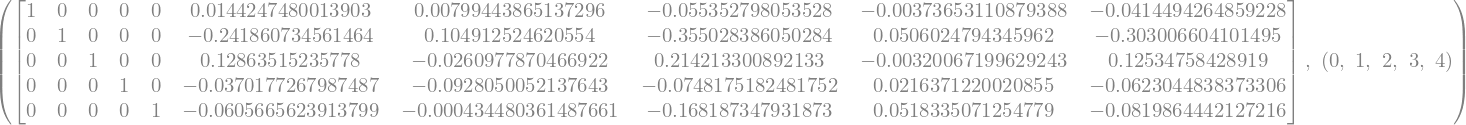

In [38]:
AI_rref = AI.rref()
AI_rref

Extract the RHS block, this is the $A^{-1}$.

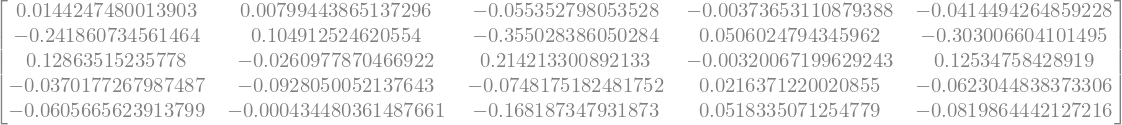

In [39]:
Ainv = AI_rref[0][:, 5:]
Ainv  # extract the RHS block

I wrote a function to round the float numbers to the $4$-th digits, on the top of this file, just for sake of readability.

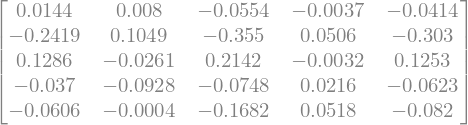

In [40]:
round_expr(Ainv, 4)

We can verify if $AA^{-1}=\mathbf{I}$

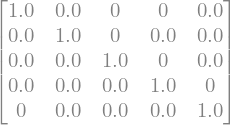

In [41]:
A = sy.Matrix(A)
round_expr(A * Ainv, 4)

We got $\mathbf{I}$, which means the RHS block is indeed $A^{-1}$.

## <font face="gotham" color="purple"> An Example of Existence of Inverse </font>

Determine the values of $\lambda$ such that the matrix
$$A=\left[ \begin{matrix}3 &\lambda &1\cr 2 & -1 & 6\cr 1 & 9 & 4\end{matrix}\right]$$
is not invertible.

Still,we are using SymPy to solve the problem.

In [42]:
lamb = sy.symbols("lamda")  # SymPy will automatically render into LaTeX greek letters
A = np.array([[3, lamb, 1], [2, -1, 6], [1, 9, 4]])
I = np.eye(3)
A

array([[3, lamda, 1],
       [2, -1, 6],
       [1, 9, 4]], dtype=object)

Form the augmented matrix.

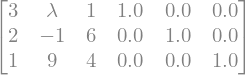

In [43]:
AI = np.hstack((A, I))
AI = sy.Matrix(AI)
AI

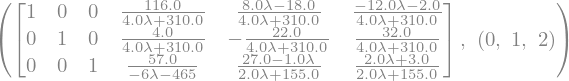

In [44]:
AI_rref = AI.rref()
AI_rref

To make the matrix $A$ invertible we notice that is multiple conditions to be satisfied, (in the denominators):
$$
\begin{align*}
-6\lambda -465 &\neq0\\
4 \lambda + 310 &\neq 0\\
2 \lambda + 155 &\neq 0
\end{align*}
$$
However, they are actually one condition, because they are multiples of each other.

Solve for $\lambda$'s.

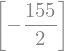

In [45]:
sy.solvers.solve(-6 * lamb - 465, lamb)

So this is the $\lambda$ that makes the matrix invertible. Let's test this with the _determinant_. If $|A| = 0$, then the matrix is not invertible, so plug in $\lambda$ back in $A$ then calculate determinant. Don't worry about determinants; we will revisit this topic later.

In [46]:
A = np.array([[3, -155 / 2, 1], [2, -1, 6], [1, 9, 4]])
np.linalg.det(A)

The $| A|$ is $0$. 

So we found that one condition, as long as $\lambda \neq -\frac{155}{2}$, the matrix $A$ is invertible.

## <font face="gotham" color="purple"> Properties of Inverse Matrices </font>

1. If $A$ and $B$ are both invertible, then $(AB)^{-1}=B^{-1}A^{-1}$.
2. If $A$ is invertible, then $(A^T)^{-1}=(A^{-1})^T$.
3. If $A$ and $B$ are both invertible and symmetric such that $AB=BA$, then $A^{-1}B$ is symmetric.

The _first property_ is straightforward
$$
\begin{align}
ABB^{-1}A^{-1}=AIA^{-1}=I=AB(AB)^{-1}
\end{align}
$$

The trick of _second property_ is to show that
$$
A^T(A^{-1})^T = I
$$
We can use the property of transpose
$$
A^T(A^{-1})^T=(A^{-1}A)^T = I^T = I
$$

The _third property_ is to show
$$
A^{-1}B = (A^{-1}B)^T
$$
Again use the property of transpose
$$
(A^{-1}B)^{T}=B^T(A^{-1})^T=B(A^T)^{-1}=BA^{-1}
$$
We use the $AB = BA$ condition to proceed
\begin{align*}
AB&=BA\\
A^{-1}ABA^{-1}&=A^{-1}BAA^{-1}\\
BA^{-1}&=A^{-1}B
\end{align*}
The plug in the previous equation, we have
$$
(A^{-1}B)^{T}=BA^{-1}=A^{-1}B
$$